In [18]:
import matplotlib.pyplot as plt
import os
import pickle
import numpy as np
def load_agents(filename):
    with open(filename, 'rb') as file:
        print('Loading agents from file: ' + filename)
        return pickle.load(file)

In [19]:
directory_path = '../saved_sim_runs'
files = [f for f in os.listdir(directory_path) if os.path.isfile(os.path.join(directory_path, f))]

files = [f for f in files if 'agents' in f]
files.sort()
print(files)

['agents_0.1.pkl', 'agents_0.2.pkl', 'agents_0.3.pkl', 'agents_0.4.pkl', 'agents_0.5.pkl', 'agents_0.6.pkl', 'agents_0.7.pkl', 'agents_0.8.pkl', 'agents_0.9.pkl']


In [20]:
sim_agents_list = []
for file in files:
    percent_low = float(file.split('agents_')[1].split('.pkl')[0])
    agents = load_agents(os.path.join(directory_path, file))
    sim_agents_list.append((percent_low, agents))

Loading agents from file: ../saved_sim_runs/agents_0.1.pkl
Loading agents from file: ../saved_sim_runs/agents_0.2.pkl
Loading agents from file: ../saved_sim_runs/agents_0.3.pkl
Loading agents from file: ../saved_sim_runs/agents_0.4.pkl
Loading agents from file: ../saved_sim_runs/agents_0.5.pkl
Loading agents from file: ../saved_sim_runs/agents_0.6.pkl
Loading agents from file: ../saved_sim_runs/agents_0.7.pkl
Loading agents from file: ../saved_sim_runs/agents_0.8.pkl
Loading agents from file: ../saved_sim_runs/agents_0.9.pkl


In [21]:
def sort_agents_by_opinion(agents):
    return sorted(agents.items(), key=lambda x: x[1].opinions[0])

Percent Low: 0.1


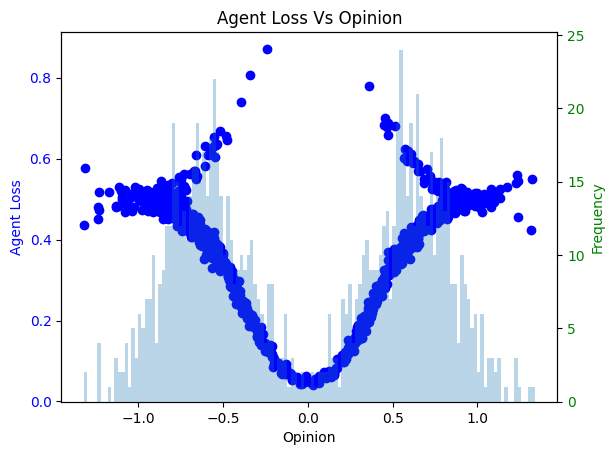

Percent Low: 0.2


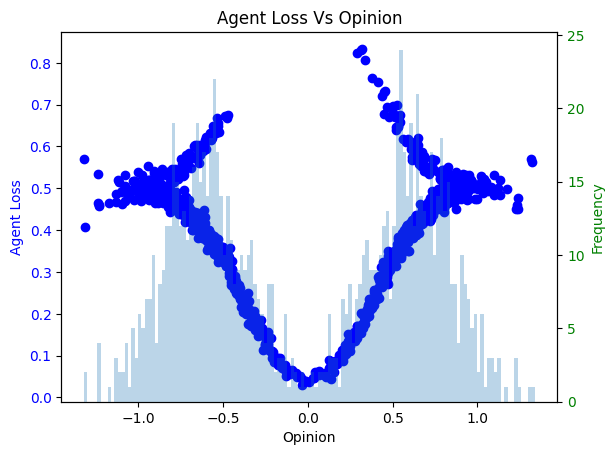

Percent Low: 0.3


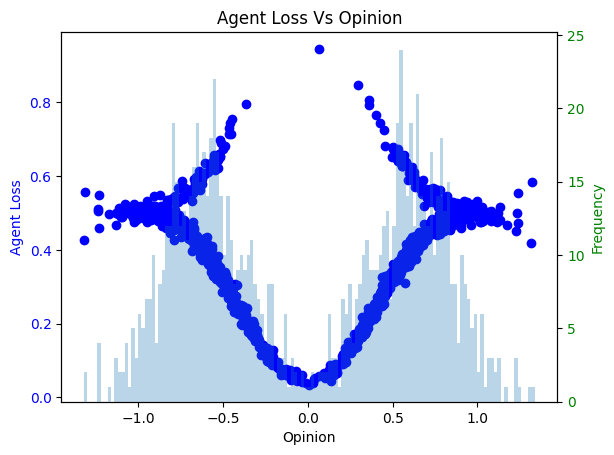

Percent Low: 0.4


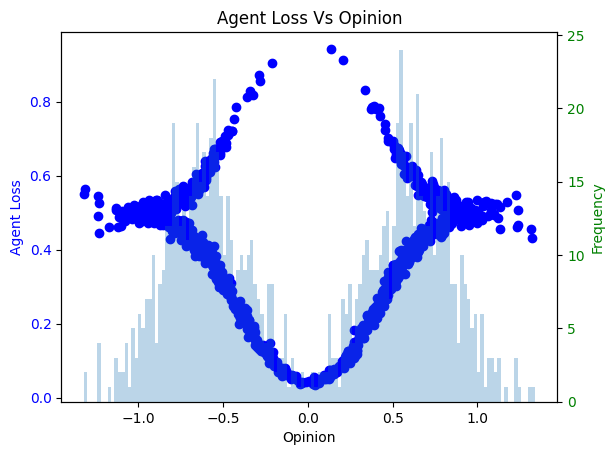

Percent Low: 0.5


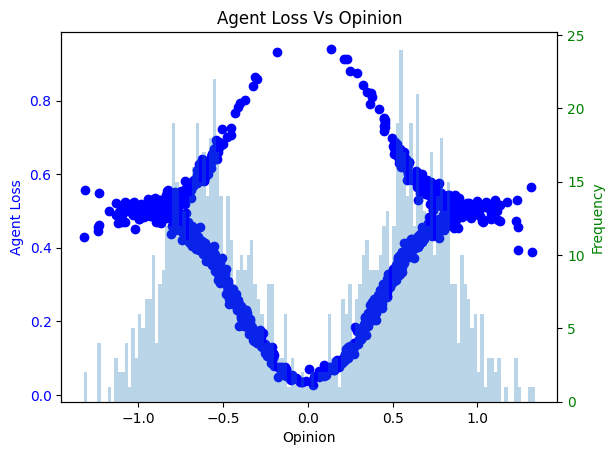

Percent Low: 0.6


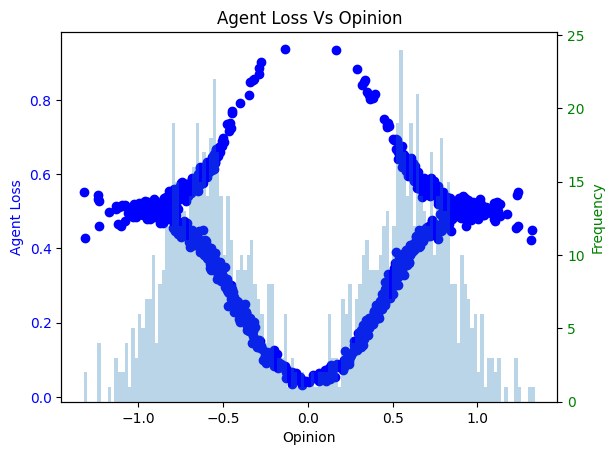

Percent Low: 0.7


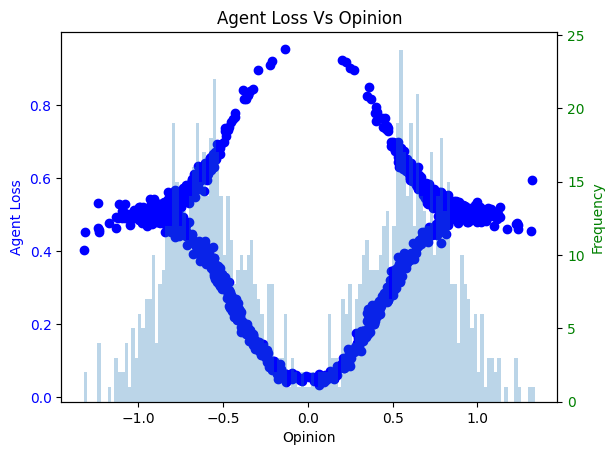

Percent Low: 0.8


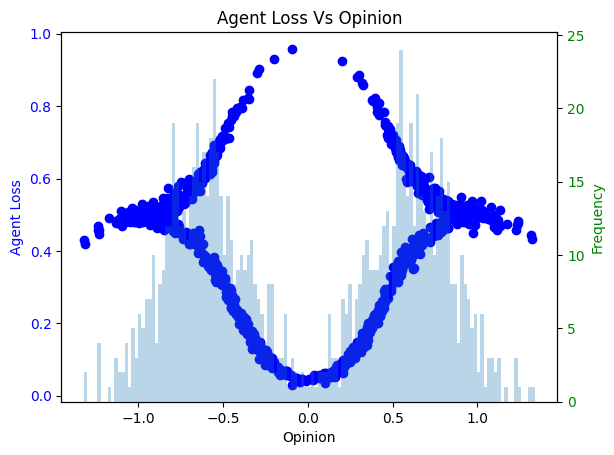

Percent Low: 0.9


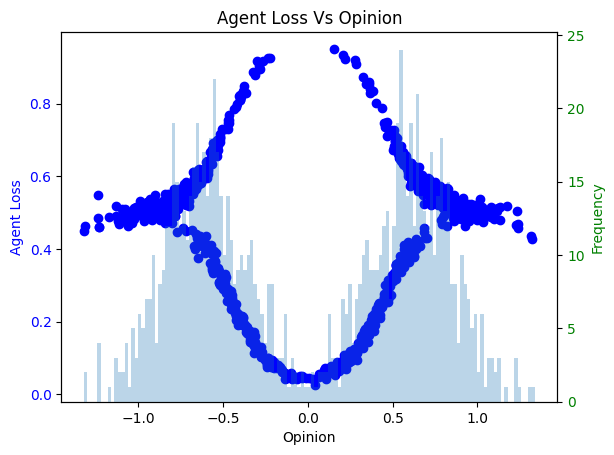

In [22]:
strat_to_threshold = {
        0: 0.01,
        1: 0.01,
        2: 0.95
    }

for percent_low, agents in sim_agents_list:
    first_agent = list(agents.values())[0]
    iterations = len(first_agent.old_strategy_weights)
    print(f"=================================")
    print(f"Percent Low: {percent_low}")
    print(f"=================================")
    for agent in agents.values():
        agent.update_agent_strat_prob_history()

    # Sort agents by their opinions
    sorted_agents = sort_agents_by_opinion(agents)

    # Assuming `sorted_agents` is a list of tuples and you have access to opinion and strategy probability data
    opinions = []
    losses = []

    # Collect data for each agent
    for uuid, agent in sorted_agents:
        opinions.append(agent.opinions[0])
        losses.append(agent.agent_loss / iterations)

    # Create a plot with two y-axes
    fig, ax1 = plt.subplots()

    # Scatter plot on primary y-axis
    ax1.scatter(opinions, losses, color='b')
    # Get range for which everyone is above the threshold
    # is_above_threshold = strat_to_threshold[strat] > 0.5
    # threshold_range = find_max_length_index_range(strat_prob, strat_to_threshold[strat], is_above_threshold)
    # if threshold_range:
    #     start_opinion = opinions[threshold_range[0]]
    #     end_opinion = opinions[threshold_range[1]]
    #     print(f"Stable Strategy Opinion Range: [{start_opinion}, {end_opinion}]")  # Printing for verification
    #     y_coord = -40 if is_above_threshold == True else -40
    #     ax1.axvspan(start_opinion, end_opinion, color='y', alpha=0.5)
    #     # ax1.annotate(f'Start: {start_opinion:.2f}', (start_opinion, strat_prob[threshold_range[0]]),
    #     #     xytext=(y_coord, 20), textcoords="offset points", ha='center', va='top', color='red')
    #     # ax1.annotate(f'End: {end_opinion:.2f}', (end_opinion, strat_prob[threshold_range[1]]),
    #     #     xytext=(-y_coord, 20), textcoords="offset points", ha='center', va='top', color='red')
    # stable_strat_opinion_ranges[f'stat_{strat}_iters_{iterations}'] = (start_opinion, end_opinion)

    # ax1.axvline(x=0, color='r', linestyle='--')  # 'r' for red, '--' for dashed line style

    ax1.set_xlabel('Opinion')
    ax1.set_ylabel(f'Agent Loss', color='b')
    
    # Create secondary y-axis for the histogram
    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    ax2.hist(opinions, bins=np.arange(min(opinions), max(opinions) + 0.02, 0.02), alpha=0.3)
    ax2.set_ylabel('Frequency', color='g')

    # Change the tick color and label color to match the plots
    ax1.tick_params(axis='y', labelcolor='b')
    ax2.tick_params(axis='y', labelcolor='g')

    plt.title(f'Agent Loss Vs Opinion')
    plt.show()
